#Import biblioteka

In [ ]:
pip install gensim

In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models.phrases import Phrases, Phraser
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tqdm

#Učitavanje podataka

In [ ]:
file_path = 'dataset_final.txt'

with open(file_path, 'r') as file:
    text = file.read()

print(text[:200])

Kada se dešava bilo kakva diskriminacija treba ostaviti sve poslove ma koliko oni bili važni i pokušati da se takva pojava spriječi. A pošto smo živi svjedoci jednog fenomena koji se dešava u vezi s n


Tekst je potrebno očistiti od nepotrebnih znakova, razdvojiti na rečenice i tokenizirati.

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|!|\?)\s', text)

for sentence in sentences:
  clean_text(sentence)
tokenized_text = [re.findall(r'\b\w+\b', sentence.lower()) for sentence in sentences]
print(tokenized_text)

[['kada', 'se', 'dešava', 'bilo', 'kakva', 'diskriminacija', 'treba', 'ostaviti', 'sve', 'poslove', 'ma', 'koliko', 'oni', 'bili', 'važni', 'i', 'pokušati', 'da', 'se', 'takva', 'pojava', 'spriječi'], ['a', 'pošto', 'smo', 'živi', 'svjedoci', 'jednog', 'fenomena', 'koji', 'se', 'dešava', 'u', 'vezi', 's', 'našim', 'jezikom', 'što', 'smo', 'ga', 'namrli', 'kao', 'našu', 'najdragocjeniju', 'baštinu', 'ostavimo', 'sve', 'na', 'stranu', 'bar', 'toliko', 'vremena', 'koliko', 'je', 'potrebno', 'da', 'se', 'iskoristi', 'svoje', 'pravo', 'na', 'pravdu', 'za', 'koju', 'smo', 'se', 'i', 'borili', 'zato', 'da', 'bi', 'mogla', 'biti', 'ostvarena'], ['nije', 'u', 'pitanju', 'samo', 'lijeva', 'pravda'], ['to', 'je', 'apsolutno', 'pravo'], ['nakon', 'sjajnog', 'perioda', 'prve', 'pismenosti', 'i', 'književnosti', 'krajem', 'dvanaestog', 'vijeka', 'u', 'kome', 'se', 'pojavljuje', 'čuvena', 'povelja', 'kulina', 'bana', 'i', 'evanđelje', 'kneza', 'miroslava', 'kulinovog', 'zeta', 'jenjava', 'pisana', 'r

#Word2vec iz Gensim biblioteke

Model bag-of-words

In [ ]:
model1 = Word2Vec(sentences=tokenized_text, min_count=5,
                     window=5,
                     vector_size=256,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0001,
                     negative=10, workers=5)

model1.build_vocab(tokenized_text, progress_per=10000)

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1

model1.train(tokenized_text, total_examples=model1.corpus_count, epochs=50, callbacks=[callback()], compute_loss=True)

Loss after epoch 0: 42357.28515625
Loss after epoch 1: 43806.25390625
Loss after epoch 2: 36043.4609375
Loss after epoch 3: 49409.09375
Loss after epoch 4: 48286.109375
Loss after epoch 5: 50281.765625
Loss after epoch 6: 47787.84375
Loss after epoch 7: 42955.90625
Loss after epoch 8: 41871.21875
Loss after epoch 9: 47871.84375
Loss after epoch 10: 48286.0
Loss after epoch 11: 48461.53125
Loss after epoch 12: 59820.0625
Loss after epoch 13: 47424.625
Loss after epoch 14: 48036.0
Loss after epoch 15: 47063.25
Loss after epoch 16: 48458.8125
Loss after epoch 17: 47674.0625
Loss after epoch 18: 47674.5625
Loss after epoch 19: 47379.125
Loss after epoch 20: 46242.8125
Loss after epoch 21: 48042.3125
Loss after epoch 22: 45435.9375
Loss after epoch 23: 45105.5
Loss after epoch 24: 45441.0
Loss after epoch 25: 61621.0
Loss after epoch 26: 46208.5
Loss after epoch 27: 43950.0
Loss after epoch 28: 45202.625
Loss after epoch 29: 43839.75
Loss after epoch 30: 43714.25
Loss after epoch 31: 43921.

(3224098, 9203350)

Model skip-gram

In [ ]:
model2 = Word2Vec(sentences=tokenized_text, min_count=5,
                     window=5,
                     vector_size=256,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=10, workers=5,
                     sg=1
                  )

model2.build_vocab(tokenized_text, progress_per=10000)

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1

model2.train(tokenized_text, total_examples=model2.corpus_count, epochs=50, callbacks=[callback()], compute_loss=True)

Loss after epoch 0: 168754.609375
Loss after epoch 1: 187820.921875
Loss after epoch 2: 183179.09375
Loss after epoch 3: 179297.5
Loss after epoch 4: 181991.75
Loss after epoch 5: 160858.5
Loss after epoch 6: 160786.25
Loss after epoch 7: 184531.125
Loss after epoch 8: 179385.75
Loss after epoch 9: 175662.5
Loss after epoch 10: 158042.125
Loss after epoch 11: 154843.625
Loss after epoch 12: 141378.75
Loss after epoch 13: 140061.5
Loss after epoch 14: 131195.25
Loss after epoch 15: 150940.75
Loss after epoch 16: 149941.25
Loss after epoch 17: 140825.75
Loss after epoch 18: 129963.0
Loss after epoch 19: 143410.75
Loss after epoch 20: 132701.0
Loss after epoch 21: 143416.5
Loss after epoch 22: 141836.5
Loss after epoch 23: 105627.0
Loss after epoch 24: 99724.25
Loss after epoch 25: 120398.25
Loss after epoch 26: 98362.0
Loss after epoch 27: 109790.75
Loss after epoch 28: 89989.5
Loss after epoch 29: 84314.5
Loss after epoch 30: 79824.0
Loss after epoch 31: 91792.5
Loss after epoch 32: 886

(3221483, 9203350)

#Vizualizacija nekih riječi u 2D

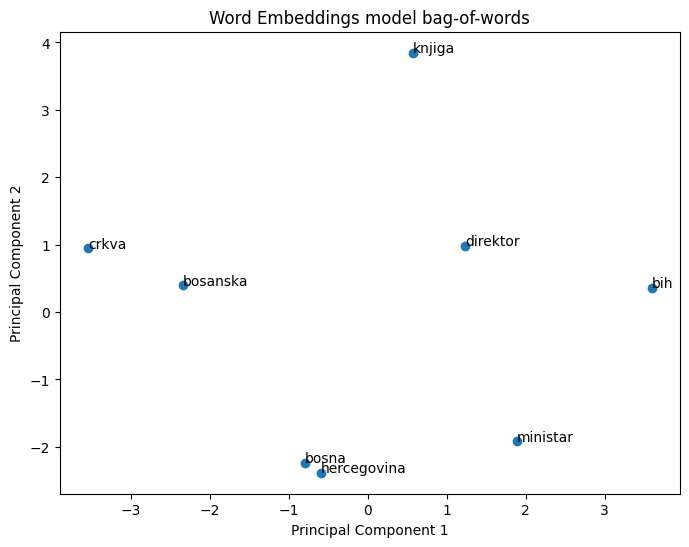

In [ ]:
words_to_plot = ['crkva', 'knjiga', 'ministar', 'direktor', 'bosanska', 'hercegovina', 'bih', 'bosna']
word_embeddings = [model1.wv[word] for word in words_to_plot]

pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

for i, word in enumerate(words_to_plot):
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('Word Embeddings model bag-of-words')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

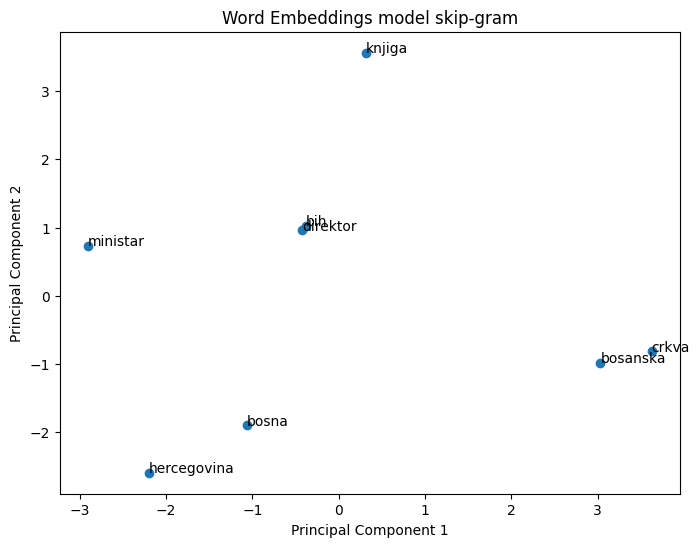

In [ ]:
words_to_plot = ['crkva', 'knjiga', 'ministar', 'direktor', 'bosanska', 'hercegovina', 'bih', 'bosna']
word_embeddings = [model2.wv[word] for word in words_to_plot]

pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

for i, word in enumerate(words_to_plot):
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('Word Embeddings model skip-gram')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
weights1 = model1.wv.vectors
vocab1 = model1.wv.key_to_index
weights2 = model2.wv.vectors
vocab2 = model2.wv.key_to_index

In [ ]:
out_v = io.open('vectors1.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata1.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab1):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights1[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

out_v = io.open('vectors2.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata2.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab2):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights2[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

#Primjeri

In [ ]:
print(model1.wv.most_similar('država'))
print(model2.wv.most_similar('država'))

[('zemlja', 0.8934537172317505), ('politika', 0.889310896396637), ('hrvatska', 0.8757787346839905), ('jugoslavija', 0.8754047155380249), ('bosna', 0.8729227781295776), ('imala', 0.8670802116394043), ('nezavisna', 0.8656238317489624), ('očuva', 0.8613290786743164), ('nezavisnost', 0.850563645362854), ('sklona', 0.8443827629089355)]
[('nezavisna', 0.5748250484466553), ('islamska', 0.48195770382881165), ('tendencija', 0.4809495806694031), ('nacionalnom', 0.4532947838306427), ('prestati', 0.45288336277008057), ('suprotno', 0.4517061412334442), ('kongresu', 0.4503892958164215), ('stepen', 0.4412505030632019), ('slobodna', 0.4378505349159241), ('raspala', 0.4375251233577728)]


In [ ]:
print(model1.wv.most_similar('bosna'))
print(model2.wv.most_similar('bosna'))

[('hercegovina', 0.946056604385376), ('zemlja', 0.8859834671020508), ('država', 0.8729227185249329), ('očuva', 0.8493450880050659), ('politika', 0.8479798436164856), ('podijeljena', 0.8337493538856506), ('jugoslavenskoj', 0.8257814049720764), ('srbija', 0.8187430500984192), ('hrvatska', 0.8152846693992615), ('pripoji', 0.8105008602142334)]
[('hercegovina', 0.7091876268386841), ('podijeljena', 0.5409740209579468), ('pripoji', 0.5392560362815857), ('postojati', 0.5035521388053894), ('tvrdnja', 0.5006872415542603), ('suprotno', 0.490877628326416), ('hum', 0.48782747983932495), ('provincija', 0.4839193522930145), ('stopu', 0.4810224175453186), ('neosporno', 0.4794484078884125)]


In [ ]:
print(model1.wv.most_similar('škola'))
print(model2.wv.most_similar('škola'))

[('osnovna', 0.9630081057548523), ('džamija', 0.9349502325057983), ('vjerska', 0.9120469093322754), ('tekija', 0.9062381982803345), ('muslimanska', 0.903296947479248), ('narodna', 0.8886922001838684), ('jevrejska', 0.8821184635162354), ('ukupno', 0.8768642544746399), ('jugoslavenska', 0.8693467974662781), ('sredinom', 0.8580251932144165)]
[('džamija', 0.6730636954307556), ('osnovna', 0.6499785780906677), ('osnovnih', 0.642719030380249), ('tekija', 0.620539665222168), ('podignu', 0.5862025022506714), ('vjerska', 0.5837849974632263), ('otvorena', 0.5741995573043823), ('jevrejska', 0.5716381072998047), ('školu', 0.570696234703064), ('državnih', 0.5688191652297974)]


In [ ]:
print(model1.wv.most_similar('kralj'))
print(model2.wv.most_similar('kralj'))

[('tvrtko', 0.9322260022163391), ('ugarski', 0.9308822751045227), ('tomaš', 0.9279338717460632), ('stjepan', 0.9274113178253174), ('princ', 0.8933830857276917), ('kotromanić', 0.8889151215553284), ('eugen', 0.8824005126953125), ('vukčić', 0.8694602847099304), ('poslao', 0.8443189859390259), ('pomoć', 0.841847836971283)]
[('tomaš', 0.7399795055389404), ('stjepan', 0.6138391494750977), ('princ', 0.584038496017456), ('kotromanić', 0.5791971683502197), ('princa', 0.5601506233215332), ('ugarski', 0.5582958459854126), ('vukčić', 0.55025315284729), ('princeza', 0.5445922017097473), ('muškarac', 0.5391759276390076), ('papi', 0.5334036946296692)]


In [ ]:
print(model1.wv.most_similar('lijepa'))
print(model2.wv.most_similar('lijepa'))

[('mlada', 0.9613906741142273), ('zrela', 0.9594711661338806), ('sestra', 0.9576781988143921), ('postaje', 0.9573954343795776), ('tvoja', 0.9564557671546936), ('majka', 0.9558876752853394), ('djevojčica', 0.9538602828979492), ('mojoj', 0.9514722228050232), ('izgledala', 0.9513276219367981), ('tobom', 0.9505934119224548)]
[('izgledala', 0.6913855671882629), ('zrela', 0.6637696027755737), ('doskora', 0.6239790916442871), ('djevojčica', 0.6229770183563232), ('ćao', 0.6202216744422913), ('mlada', 0.6194470524787903), ('princeza', 0.6061587929725647), ('draga', 0.5875377655029297), ('domaćica', 0.5843120217323303), ('krilu', 0.5837935209274292)]


In [ ]:
vec = model1.wv['kralj'] - model1.wv['muškarac'] + model1.wv['žena']
model1.wv.most_similar([vec])

[('kralj', 0.9368336200714111),
 ('tomaš', 0.8999935388565063),
 ('princeza', 0.8842263221740723),
 ('princ', 0.8764947652816772),
 ('kraljica', 0.8602070212364197),
 ('stjepan', 0.8583930134773254),
 ('tvrtko', 0.8491855263710022),
 ('ugarski', 0.8462231755256653),
 ('kotromanić', 0.8167941570281982),
 ('obratio', 0.8110249638557434)]

In [ ]:
vec = model2.wv['kralj'] - model2.wv['muškarac'] + model2.wv['žena']
model2.wv.most_similar([vec])

[('kralj', 0.7372837662696838),
 ('žena', 0.6087566018104553),
 ('tomaš', 0.5647578239440918),
 ('princeza', 0.4687802493572235),
 ('stjepan', 0.46173909306526184),
 ('papi', 0.45981165766716003),
 ('ban', 0.43654197454452515),
 ('kotromanić', 0.43443647027015686),
 ('shvatio', 0.43149396777153015),
 ('vješto', 0.4282129406929016)]

In [ ]:
vec = model1.wv['princ'] - model1.wv['snažan'] + model1.wv['lijepa']
model1.wv.most_similar([vec])

[('muškarac', 0.8911391496658325),
 ('princeza', 0.8784302473068237),
 ('žena', 0.8763452172279358),
 ('lijepa', 0.8356622457504272),
 ('princa', 0.8322423100471497),
 ('postaje', 0.8137780427932739),
 ('princ', 0.8022250533103943),
 ('sestra', 0.7943155765533447),
 ('kraljica', 0.7914983034133911),
 ('doista', 0.7864844799041748)]

In [ ]:
vec = model2.wv['princ'] - model2.wv['snažan'] + model2.wv['lijepa']
model1.wv.most_similar([vec])

[('lijepa', 0.44342902302742004),
 ('princeza', 0.436008095741272),
 ('žena', 0.4275928735733032),
 ('muškarac', 0.4267127215862274),
 ('princ', 0.4232669472694397),
 ('princa', 0.4128396809101105),
 ('kraljica', 0.4061361849308014),
 ('obratio', 0.40431851148605347),
 ('briga', 0.403457373380661),
 ('nje', 0.3943694531917572)]

In [ ]:
vec = model1.wv['vjera'] - model1.wv['islam'] + model1.wv['crkva']
model1.wv.most_similar([vec])

[('bosanska', 0.8920102715492249),
 ('crkva', 0.8758792281150818),
 ('pravoslavna', 0.8755232095718384),
 ('katolička', 0.7834309935569763),
 ('prva', 0.7426572442054749),
 ('organizacija', 0.7183338403701782),
 ('jedna', 0.7061612606048584),
 ('koja', 0.6873536109924316),
 ('raspala', 0.681583046913147),
 ('bila', 0.6783639192581177)]

In [ ]:
vec = model2.wv['princ'] - model2.wv['snažan'] + model2.wv['lijepa']
model2.wv.most_similar([vec])

[('lijepa', 0.6614486575126648),
 ('princeza', 0.6043351292610168),
 ('princ', 0.5701280832290649),
 ('žena', 0.5366845726966858),
 ('zrela', 0.5039913058280945),
 ('eugen', 0.4919140636920929),
 ('kraljica', 0.48466169834136963),
 ('djevojčica', 0.46877461671829224),
 ('princa', 0.46573302149772644),
 ('babo', 0.45772433280944824)]

In [ ]:
model1.wv['princ'] - model2.wv['princeza']

array([ 0.20611374,  0.02769816,  0.3237721 ,  0.10535704,  0.04615891,
        0.02177909, -0.3567985 , -0.175137  , -0.3269291 ,  0.01173374,
        0.1163049 ,  0.63590914, -0.4766984 ,  0.02181406, -0.15186128,
        0.1532254 , -0.44508916, -0.05740015, -0.58937   , -0.3458277 ,
       -0.23874417,  0.16212259,  0.10383877, -0.15277001, -0.3100727 ,
        0.03891507,  0.13882789, -0.2163558 , -0.03857525, -0.19796222,
       -0.1446538 , -0.09375468, -0.17091036, -0.03877907,  0.06321768,
       -0.19437203,  0.11543117,  0.22284052,  0.05159317,  0.26133797,
       -0.16397408, -0.20751314, -0.24168502,  0.2828181 ,  0.19801357,
       -0.05645641, -0.28630403, -0.1315364 , -0.32709616,  0.03817761,
       -0.34817877,  0.04819509, -0.09420133, -0.01920319,  0.02742642,
        0.35527548, -0.06406704, -0.1580531 , -0.45304623,  0.1902443 ,
       -0.20908853,  0.2660459 , -0.38335994,  0.02179384,  0.36305195,
        0.05249116, -0.38019463,  0.19276139,  0.05391516,  0.16

In [ ]:
model1.wv['muškarac'] - model2.wv['žena']

array([ 0.32595137, -0.10678364,  0.31083462, -0.15143444,  0.3006832 ,
       -0.29983014, -0.02703945, -0.06144542, -0.11553742,  0.01904573,
       -0.0706066 ,  0.12657489, -0.49278152, -0.05762896,  0.26084948,
       -0.13850307, -0.01931103, -0.33080697, -0.2959083 ,  0.11256958,
       -0.10665578,  0.3150652 ,  0.05204549, -0.11539327,  0.52856517,
       -0.03168872, -0.05839856, -0.37326366, -0.19149415,  0.23364477,
       -0.06146196, -0.27405122, -0.01593819, -0.39309758,  0.05328801,
       -0.16824728,  0.41891244, -0.1834899 ,  0.4809069 ,  0.40053666,
        0.31513864, -0.02584107, -0.22150224, -0.02165005,  0.3230727 ,
        0.06958395, -0.28657258, -0.24560186, -0.3497683 , -0.28485492,
       -0.3128426 ,  0.00843009, -0.17276973,  0.3231557 ,  0.02907789,
        0.08426172,  0.01075763, -0.03061071, -0.36706614,  0.49843273,
       -0.2559781 ,  0.19077879, -0.25916547, -0.07290196,  0.221311  ,
        0.14564502, -0.20157015,  0.1966164 ,  0.2201837 , -0.21